<font size="+3"><strong>4.3. Predicting bank term deposit with Decision Trees</strong></font>

# Explore

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree

from category_encoders import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.utils.validation import check_is_fitted

In [2]:
df = pd.read_csv("Bankdata.csv")

df = df.drop("Unnamed: 0", axis=1)
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (86399, 15)


,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,yes,no,unknown,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,yes,no,unknown,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,yes,no,unknown,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,no,no,unknown,may,198,1,-1,0,unknown,no


In [3]:
filepath = "Bank Marketing/Bankdata.csv"

def wrangle(filepath):
    """
    Wrangles the  data by:
    1. Reading the CSV file.
    2. Dropping the 'Unnamed: 0' column.
    3. Encoding the target variable 'y' to 0 and 1.
    4. Selecting only numeric data features.

    Parameters:
    filepath (str): Path to the CSV file.

    Returns:
    pd.DataFrame: Cleaned and wrangled DataFrame.
    """
    # Read the CSV file
    df = pd.read_csv(filepath)

    # Drop unnecessary column 'Unnamed: 0'
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)

    # Encode target variable 'y' to 0 and 1
    if 'y' in df.columns:
        df['y'] = df['y'].map({'yes': 1, 'no': 0})

    # Select only numeric data features
    df = df.select_dtypes(include='number')

    # Print DataFrame type and shape
    print("df type:", type(df))
    print("df shape:", df.shape)

    return df

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,yes,no,unknown,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,yes,no,unknown,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,yes,no,unknown,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,no,no,unknown,may,198,1,-1,0,unknown,no


## Split

Create a feature matrix `X` and target vector `Y`. The target is `"y"`. 

In [5]:
target = "y"
X = df.drop(columns=target)
Y = df[target]

print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (86399, 14)
Y shape: (86399,)


Divide the data (`X` and `Y`) into training and test sets using a randomized train-test split. The validation set should be 20% of the total data. Set a `random_state` for reproducibility. 

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state = 42)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (69119, 14)
Y_train shape: (69119,)
X_test shape: (17280, 14)
Y_test shape: (17280,)


In [7]:
# Check your work
assert X_train.shape == (
    69119,
    14,
), f"The shape of `X_train` should be (69119, 14), not {X_train.shape}."
assert Y_train.shape == (
    69119,
), f"The shape of `Y_train` should be (69119,), not {Y_train.shape}."
assert X_test.shape == (
    17280,
    14,
), f"The shape of `X_test` should be (17280, 11), not {X_test.shape}."
assert Y_test.shape == (
    17280,
), f"The shape of `Y_test` should be (17280,), not {Y_test.shape}."

Divide your training data (`X_train` and `Y_train`) into training and validation sets using a randomized train-test split. Your validation data should be 20% of the remaining data. Don't forget to set a `random_state`.

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 
                                                    test_size=0.2, # refering to the size of the validation set
                                                    random_state = 42)

# Build Model

## Baseline

Calculate the baseline accuracy score for your model.

In [9]:
acc_baseline = Y_train.value_counts(normalize =True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.89


## Iterate

Create a pipeline named `model` that contains a `OrdinalEncoder` transformer and a `DecisionTreeClassifier` predictor. (Be sure to set a `random_state` for your predictor.) Then fit your model to the training data.

In [10]:
# Build Model
model = make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(random_state=42))

# Fit model to training data
model.fit(X_train, Y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'education', 'default',
                                      'housing', 'loan', 'contact', 'month',
                                      'poutcome'],
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': admin.            1
blue-collar       2
management        3
technician        4
services          5
entrepreneur      6
unemployed        7
self-employed     8
unknown           9
housemaid        10
retired          11
student          12
NaN              -2
dtype: int64},
                                         {'col': 'mari...
                                          'mapping': telephone    1
cellular     2
unknown      3
NaN         -2
dtype: int64},
                                         {'col': 'month',
                                          'data_type': dtype('O'),
                                          'mapping': may     1
jun     2
nov     3
jul     4
aug     5
oct     6
jan     7
feb     8
apr     9
sep    10
mar    11
dec    12
NaN    -2
dtype: int64},
                                         {'col': 'poutcome',
                                          'data_type': dtype('O'),
                                          'mapping': nonexistent    1
unknown        2
failure        3
success        4
other          5
NaN           -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [11]:
# Check your work
assert isinstance(
    model, Pipeline
), f"`model` should be a Pipeline, not type {type(model)}."
assert isinstance(
    model[0], OrdinalEncoder
), f"The first step in your Pipeline should be an OrdinalEncoder, not type {type(model[0])}."
assert isinstance(
    model[-1], DecisionTreeClassifier
), f"The last step in your Pipeline should be an DecisionTreeClassifier, not type {type(model[-1])}."
check_is_fitted(model)

Calculate the training and validation accuracy scores for your models.

In [12]:
acc_train = accuracy_score(Y_train,model.predict(X_train))
acc_val = model.score(X_val, Y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 1.0
Validation Accuracy: 0.87


The model is not generalizing well on the validation data since Validation Accuracy < Baseline Accuracy, hence need for hyperparameter tuning.

Use the [`get_depth`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.get_depth) method on the `DecisionTreeClassifier` in your model to see how deep your tree grew during training. 


In [13]:
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 32


Create a range of possible values for `max_depth` hyperparameter of your model's `DecisionTreeClassifier`. `depth_hyperparams` should range from `1` to `50` by steps of `2`.

In [14]:
depth_hyperparams = range(1, 50, 2)

In [15]:
# Check your work
assert (
    len(list(depth_hyperparams)) == 25
), f"`depth_hyperparams` should contain 25 items, not {len(list(depth_hyperparams))}."
assert (
    list(depth_hyperparams)[0] == 1
), f"`depth_hyperparams` should begin at 1, not {list(depth_hyperparams)[0]}."
assert (
    list(depth_hyperparams)[-1] == 49
), f"`depth_hyperparams` should end at 49, not {list(depth_hyperparams)[-1]}."

Complete the code below so that it trains a model for every `max_depth` in `depth_hyperparams`. Every time a new model is trained, the code should also calculate the training and validation accuracy scores and append them to the `training_acc` and `validation_acc` lists, respectively. 

In [16]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(max_depth=d, random_state=42))
    # Fit model to training data
    test_model.fit(X_train, Y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, Y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val, Y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.8864996835156885, 0.9008409440274889, 0.9081833800524459]
Validation Accuracy Scores: [0.8789785879629629, 0.8941695601851852, 0.9024160879629629]


New scores of `Training Accuracy` and `Validation Accuracy` beat `Baseline Accuracy` implying an improved in the model.

In [17]:
# Check your work
assert (
    len(training_acc) == 25
), f"`training_acc` should contain 25 items, not {len(training_acc)}."
assert (
    len(validation_acc) == 25
), f"`validation_acc` should contain 25 items, not {len(validation_acc)}."

Create a visualization with two lines. The first line should plot the `training_acc` values as a function of `depth_hyperparams`, and the second should plot `validation_acc` as a function of `depth_hyperparams`. You x-axis should be labeled `"Max Depth"`, and the y-axis `"Accuracy Score"`. Also include a legend so that your audience can distinguish between the two lines.

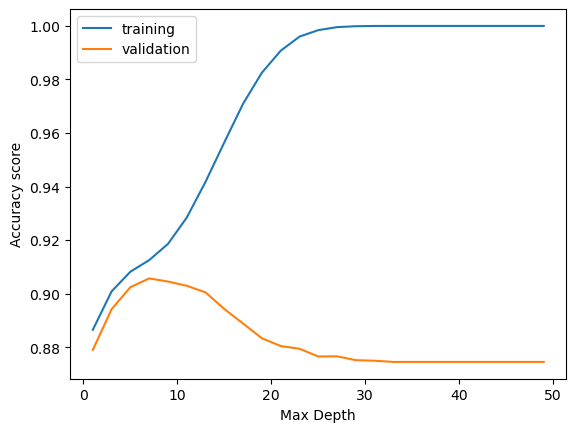

In [18]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc,label= "training")
plt.plot(depth_hyperparams, validation_acc,label= "validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy score")
plt.legend();

## Evaluate

 Based on your visualization, choose the `max_depth` value that leads to the best validation accuracy score. Then retrain your original model with that `max_depth` value. Lastly, check how your tuned model performs on your test set by calculating the test accuracy score below. Were you able to resolve the overfitting problem with this new `max_depth`?

In [19]:
test_acc = model.score(X_test, Y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.88


# Communicate

Complete the code below to use the [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) function from scikit-learn to visualize the decision logic of your model. 

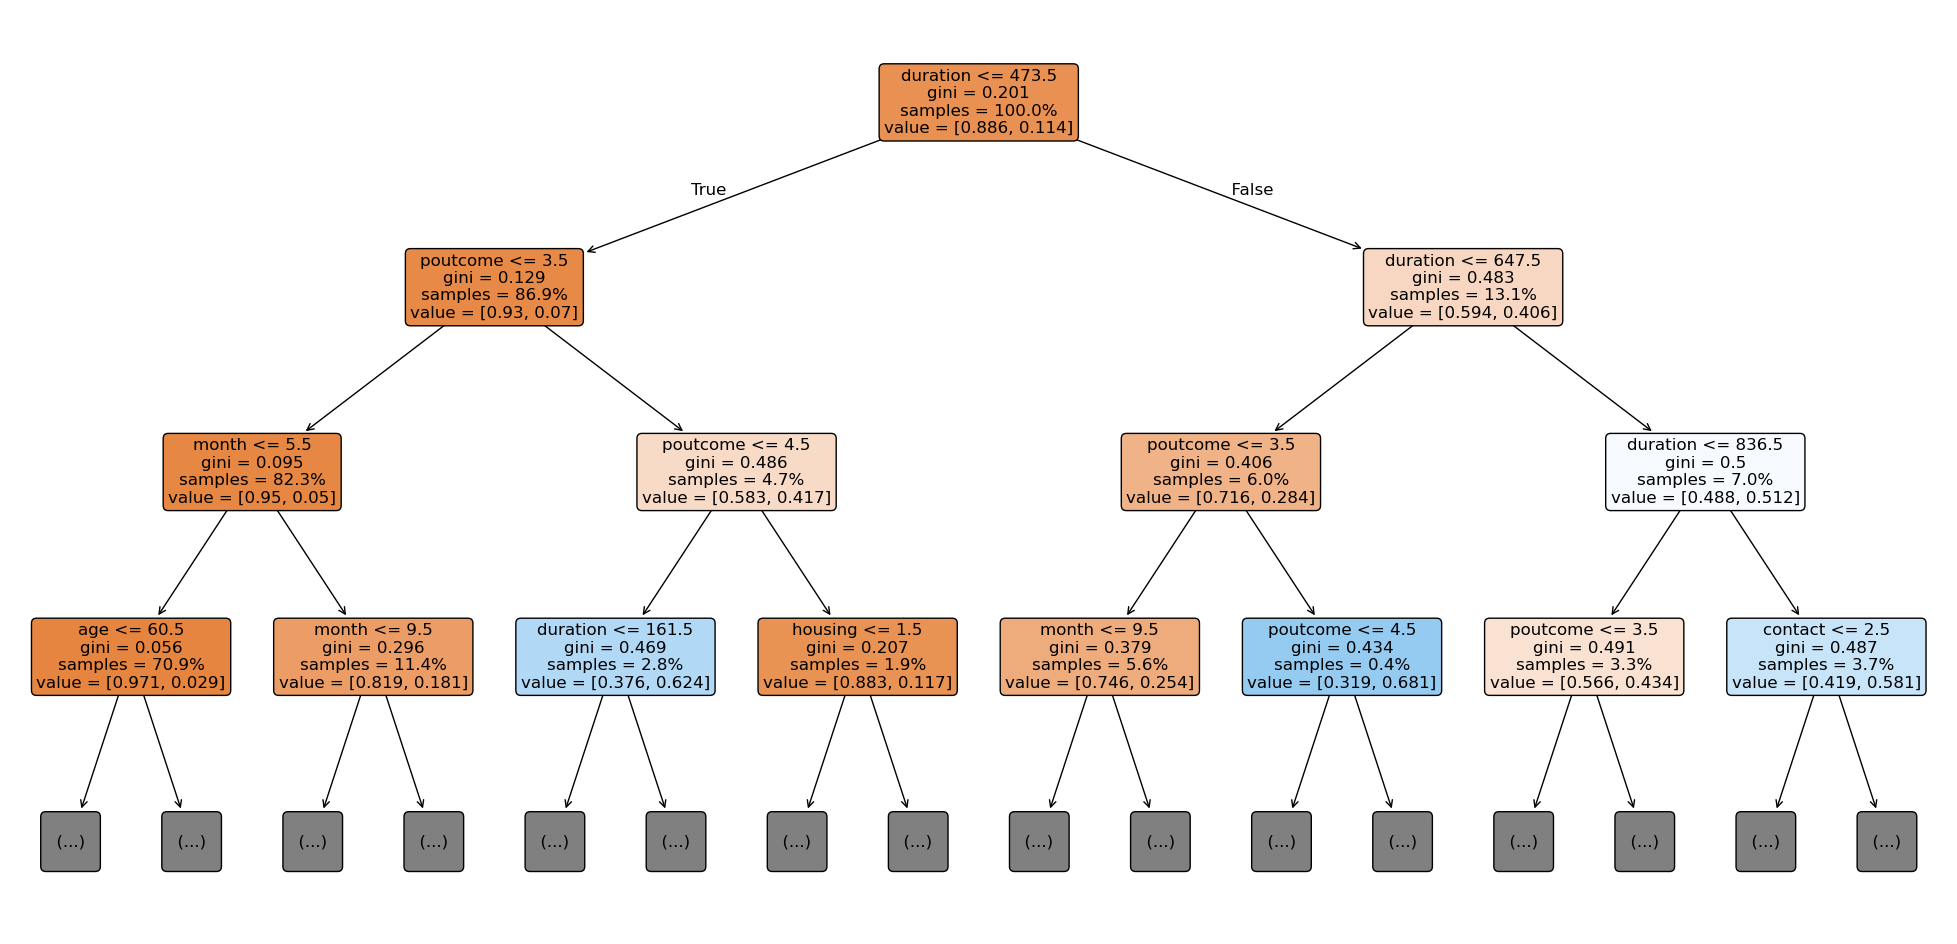

In [21]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns.to_list(),
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

Considering the first node with:-
duration <= 473.5, gini = 0.201, samples=100.0%,value = [0.886, 0.114], 

implies that for clients with the last contact duration with less than 473.5 seconds (~ 8minutes), the model predicted that they would opt for a bank term deposit account.

gini = 0.201, implies that the first node had a purity level of 20% which gradually reduces as the model splits.

value = [0.886, 0.114]; implies that 88.6% of the clients whose `last contact duration` with a minimum of 8 minutes did not subscribe a term deposit &                              11.4% of the clients with the similar contact duration subscribed to a term deposit. In this case, the orange nodes represent that a client does not subscribe to a term deposit while the blue nodes represent that a client subscribes to a term deposit. 

**NB:** As the splits progress in the model, genie impurity decreases, the percentage of samples in each node decreases & then the proportion of one class, one particular class over another class and each node goes up, it increases.

Assign the feature names and importances of your model to the variables below. For the `features`, you can get them from the column names in your training set. For the `importances`, you access the [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) attribute of your model's `DecisionTreeClassifier`.

In [44]:
features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['age', 'job', 'marital'], dtype='object')
Importances: [0.12895567 0.05886919 0.02382722]


Create a pandas Series named `feat_imp`, where the index is `features` and the values are your `importances`. The Series should be sorted from smallest to largest importance.

In [45]:
feat_imp = pd.Series(importances, index = features).sort_values()
feat_imp.head()

default     0.007413
loan        0.015315
contact     0.015502
previous    0.017618
housing     0.019741
dtype: float64

Create a horizontal bar chart with all the features in `feat_imp`. Be sure to label your x-axis `"Gini Importance"`.

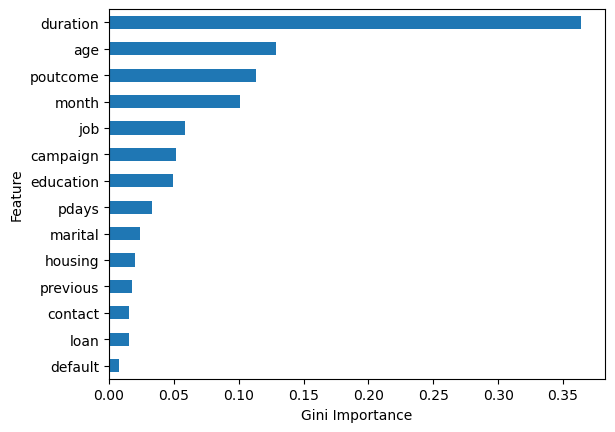

In [46]:
# Create horizontal bar chart
feat_imp.plot(kind= "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature");

*`Duration`* is responsible for about 35% increase in purity in the nodes or decrease in impurity of the nodes. It is essential in dividing features from impure nodes to pure nodes. While `age` and `poutcome` are responsible for 14% and 13% respectively.

<center>
<table>
  <tr>
    <th>Date (YYYY-MM-DD)</th>
    <th>Author</th>
  </tr>
  <tr>
    <td>2025-02-22</td>
    <td>Andrew Kalumba Harris</td>
    <td>andrewkalumbaharris@gmail.com</td>
  </tr>
</table>
</center>
